## Rešitev

Najprej samo "povzetek": vse zbrane rešitve nalog (in njihove teme, da boste videli, za kaj je šlo na izpitu). Besedila nalog, alternativne rešitve in podrobnejše razlage pa so spodaj.

In [7]:
# 1. Zanke

def skupne_tocke(pot1, pot2):
    return {a for a, b in zip(pot1, pot2) if a == b}


# 2. Datoteke in nizi

def preberi_zemljevid(ime_datoteke):
    zemljevid = {}
    for vrstica in open(ime_datoteke):
        povezava, vescine = vrstica.split(":")
        a, b = povezava.split("-")
        zemljevid[a, b] = set()
        if vescine.strip():
            for vescina in vescine.split(","):
                zemljevid[a, b].add(vescina.strip())
    return zemljevid

def shrani_zemljevid(ime_datoteke, zemljevid):
    f = open(ime_datoteke, "w")
    for (a, b), vescine in zemljevid.items():
        f.write(f'{a}-{b}: {", ".join(sorted(vescine))}\n')
        

# 3. Slovarji in množice

def vescine(krizisce, zemljevid):
    vesce = set()
    for k1, k2 in zemljevid:
        if k1 == krizisce:
            vesce |= zemljevid[(k1, k2)]
    return vesce


# 4. Rekurzivne funkcije

def stevilo_poti(odkod, kam, povezave):
    if odkod == kam:
        return 1
    nacinov = 0
    for a, b in povezave:
        if a == odkod and b > a:
            nacinov += stevilo_poti(b, kam, povezave)
    return nacinov

## 1. Skupne povezave

Dva kolesarja sta šla istočasno na pot. Za vsako povezavo sta potrebovala enako časa. Napiši funkcijo `skupne_tocke(pot1, pot2)`, ki vrne množico točk, v katerih sta se srečala. V primeru na sliki vrne `{"I", "M", "E", "T", "U"}`.

### Rešitev

Lahko bi napisali



In [2]:
def skupne_tocke(pot1, pot2):
    skupne = set()
    for a, b in zip(pot1, pot2):
        if a == b:
            skupne.add(a)
    return skupne

Ampak ne bomo. To se reši tako:

In [3]:
def skupne_tocke(pot1, pot2):
    return {a for a, b in zip(pot1, pot2) if a == b}

## 2. Datoteka z zemljevidom

Zemljevid je shranjen v datoteki v takšni obliki.

Napiši funkcijo `preberi_zemljevid(ime_datoteke)` in vrne slovar z zemljevidom: ključi so pari križišč, vrednosti množice veščin, potrebnih, da prevozimo to povezavo. Za primer s slike vrne `{("BF", "FRI"): {"trava", "gravel", "pesek"}, ("BF", "FDV"): {"pesek"}, ("FRI", "EF"): {"trava"}, ("BF", "EF"): set()}`. (Pazi: za dvopičjem v tretji vrstici ni presledka.)

Napiši funkcijo `shrani_zemljevid(ime_datoteke, zemljevid)`, ki prejme ime datoteke in zemljevid ter shrani zemljevid v datoteko. Za polne točke morajo biti veščine urejene po abecedi. (Če določena povezava ne zahteva veščin, smeš vseeno narediti presledek za dvopičjem.)

### Rešitev

Pripravimo prazen slovar. Gremo čez datoteko. Vsako vrstico razbijemo glede na `:` na `povezava` in `vescine`. Povezavo nadalje razbijemo na prvo in drugo križišče in v slovar pod ta ključ dodamo prazno množico. Če povezava zahteva kake veščine, jih razbijemo glede na `,`. Vsaki veščini odluščimo odvečne presledke in jo dodamo v množico.

In [ ]:
def preberi_zemljevid(ime_datoteke):
    zemljevid = {}
    for vrstica in open(ime_datoteke):
        povezava, vescine = vrstica.split(":")
        a, b = povezava.split("-")
        zemljevid[a, b] = set()
        if vescine.strip():
            for vescina in vescine.split(","):
                zemljevid[a, b].add(vescina.strip())
    return zemljevid

Pisanje je kot (skoraj) vedno preprostejše. Pripravimo datoteko. Gremo čez zemljevid in za vsak par povezav in veščin zapišemo povezavo (`f"{a}-{b}"`) ter pripadajoče veščine, ki ga dobimo tako, da z `, ` združimo njihov urejen seznam. Na koncu vrstice ne pozabimo na znak za novo vrstico.

In [4]:
def shrani_zemljevid(ime_datoteke, zemljevid):
    f = open(ime_datoteke, "w")
    for (a, b), vescine in zemljevid.items():
        f.write(f'{a}-{b}: {", ".join(sorted(vescine))}\n')

Tole sicer doda presledek za dvopičjem tudi, kadar je množica veščin prazna. Testi to prijazno ignorirajo.

## 3. Veščine

Napiši funkcijo `vescine(tocka, zemljevid)`, ki za podano točko vrne imena vseh veščin, ki so na povezavah, ki vodijo iz te točke. Za primer na spodnji sliki klic `vescine("J", zemljevid)` vrne `{"robnik", "bolt", "gravel"}`.

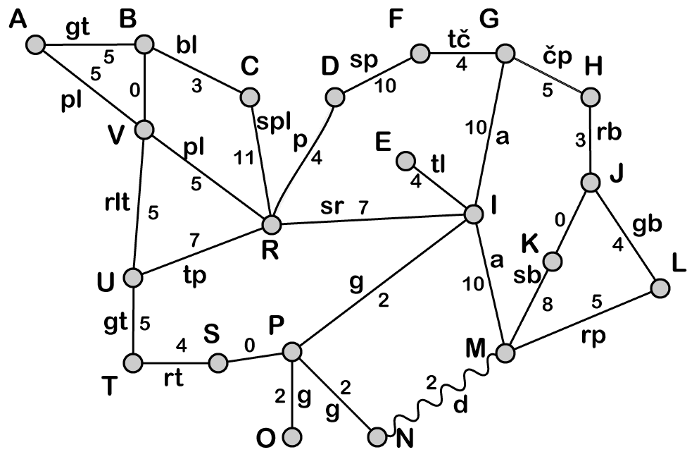

### Rešitev

Recimo tako. Gremo čez povezave na zemljevidu. Če je izvorna točka povezave enaka podanemu križišču, dodamo v množico vseh potrebnih veščin veščine, ki jih zahteva ta povezava.

In [6]:
def vescine(krizisce, zemljevid):
    vesce = set()
    for k1, k2 in zemljevid:
        if k1 == krizisce:
            vesce |= zemljevid[(k1, k2)]
    return vesce

Lahko pa gremo čez `items` in bomo imeli veščine že pri roki.

In [ ]:
def vescine(krizisce, zemljevid):
    vesce = set()
    for (k, _), potrebno in zemljevid.items():
        if k == krizisce:
            vesce |= potrebno
    return vesce

## 4. Izbire, izbire, izbire

Ker je prva prioriteta Mestne občine Ljubljana (MOL) varnost kolesarjev, so sprejeli predpis, po katerem smemo iz vsakega križišča voziti le v križišča, katerih ime je po abecedi kasnejše od trenutnega: iz D smemo v R, obratno pa ne.

Kolesarji se, kot vedno, usajajo, zato bi MOL rad pokazal, da v ničemer ne omejuje svobode kolesarjev. MOL prosi, da sestaviš funkcijo `stevilo_poti(odkod, kam, zemljevid)`, ki vrne število možnih načinov, na katere lahko pridemo od odkod do kam.

Klic `stevilo_poti("G", "N", zemljevid)` vrne 3 (možne poti so GIMN, GHJKMN, GJLMN).

### Rešitev

Tole je očitno naloga iz rekurzije.

Da bo lepše teklo, si lahko napišemo pomožno funkcijo `povezani(odkod, zemljevid)`, ki vrne vsa križišča, v katera lahko pridemo iz `odkod`.

In [9]:
def povezani(odkod, zemljevid):
    return {b for a, b in povezave if a == odkod and b > a}

In zdaj je stvar praktično enaka eni od domačih nalog (in ta je enaka funkciji, ki smo jo imeli na predavanjih, to je, velikosti rodbine).

In [10]:
def stevilo_poti(odkod, kam, povezave):
    if odkod == kam:
        return 1
    nacinov = 0
    for naprej in povezani(odkod, povezave):
        nacinov += stevilo_poti(naprej, kam, povezave)
    return nacinov

Seveda bi šlo tudi brez pomožne funkcije.

In [11]:
def stevilo_poti(odkod, kam, povezave):
    if odkod == kam:
        return 1
    nacinov = 0
    for a, b in povezave:
        if a == odkod and b > a:
            nacinov += stevilo_poti(b, kam, povezave)
    return nacinov

Bolj duhoviti pa z nalogo opravijo v enem zamahu.

In [12]:
def stevilo_poti(odkod, kam, povezave):
    return odkod == kam or sum(stevilo_poti(b, kam, povezave) for a, b in povezave if a == odkod and b > a)